In [1]:
#importar librerias
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
#1) LEER Y PARTIR LOS DARTOS
#importar los datos
datos = np.loadtxt("datos.txt")
#como renglones para modificarlos mas facil
datos = np.transpose(datos)
x = datos[0]
y = datos[1]
m = len(y)
limite = int(0.8 * m)
x_train, x_test = x[:limite], x[limite:]
y_train, y_test = y[:limite], y[limite:]
#print(y_train.shape,y_test.shape)

In [3]:
#2) DEFINIR HIPERPARAMETROS
learning_rate = 0.2
#Tiempo en que se modifican los parametros (batch)
epocas = 20

In [4]:
#3) Definir los tensores
#se define el tipo para que no vaya a agarrar 64
X = tf.constant(x_train, dtype = tf.float32)
Y = tf.constant(y_train, dtype = tf.float32)
T0 = tf.Variable(0.0, dtype = tf.float32)
T1 = tf.Variable(0.0, dtype = tf.float32)

In [5]:
#4) Definir el modelo y costo
def modelo(T0, T1, X): #la Y se usa hasta el costo
    return T0 + T1 * X

def costo(T0, T1, X, Y):
    return tf.reduce_sum(tf.square(modelo(T0, T1, X) - Y)) 
#Reduce_sum sustituye al for que tendríams que usar para la sumatoria

#Necesitamos uno que no tenga parámetros.
def costo_minimizar():
    return tf.reduce_mean(tf.square(modelo(T0, T1, X) - Y)) #Aqui con MEAN saca el error promedio para que saque el promedio y no el total

# Algoritmo para encontrar los valores, gradiente descendiente. Este es el que no acepta con parametros, el algoritmo de gradiente descendiente
train_op = tf.keras.optimizers.SGD(learning_rate)

In [6]:
# 5) Correr el modelo
#Esta lista va a guardar los errores de las epocas para poder graficarlo y ver que disminuye el error
lista_error = []
for epoca in range(epocas):
    error = costo(T0,T1,X,Y).numpy() #numpy obtiene el valor del tensor
    print("epoca ", epoca, ": ", error)
    lista_error.append(error) #esto guarda el error a la lista
    train_op.minimize(costo_minimizar, var_list = [T0,T1]) #var_list son los que puede ir cambiando
t0 = T0.numpy()
t1 = T1.numpy()
print("to: ", t0, " t1: ",t1)

epoca  0 :  128.97827
epoca  1 :  97.11648
epoca  2 :  73.727875
epoca  3 :  56.54454
epoca  4 :  43.9149
epoca  5 :  34.630295
epoca  6 :  27.804077
epoca  7 :  22.785076
epoca  8 :  19.09475
epoca  9 :  16.381325
epoca  10 :  14.3861885
epoca  11 :  12.919188
epoca  12 :  11.840521
epoca  13 :  11.047392
epoca  14 :  10.464212
epoca  15 :  10.035409
epoca  16 :  9.720114
epoca  17 :  9.488279
epoca  18 :  9.317816
epoca  19 :  9.192476
to:  -0.035843607  t1:  1.9570575


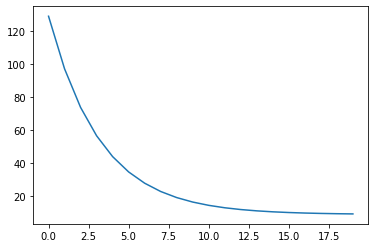

In [7]:
# graficar el error obtenido en cada epoca
plt.plot(lista_error)
plt.show()

In [8]:
#probar con el test, calcular el error que provoca el test (error cuadratico)
print("Error en test: ", costo(T0,T1,x_test, y_test).numpy())


Error en test:  3.3618875


In [9]:
#Lo que se le vende es su modelo en produccion
#pronostico
def pronostico(X):
    return t0 + t1 * np.array(X)

In [10]:
x_pronostico = [-0.847, 0.0421, 0.5923, 3.04]
y_pronostico = pronostico(x_pronostico)
y_pronostico

array([-1.69347129,  0.04654851,  1.12332154,  5.91361112])